### Setup


In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

### Explore Audio Data

In [19]:
os.listdir(f"D:\GTZAN Dataset\genres_original")

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [20]:
# Importing 1 file
y, sr = librosa.load(r"D:\GTZAN Dataset\genres_original\rock\rock.00006.wav")

print('y:', y)
print()
print('y.shape:', y.shape)
print()
print('Sample Rate (KHz):', sr)

y: [ 0.11206055  0.1816101   0.16653442 ...  0.13134766  0.09609985
 -0.01416016]

y.shape: (661794,)

Sample Rate (KHz): 22050


In [21]:
# Verify length of the audio
print('Check length of audio:', len(y) / sr)

Check length of audio: 30.013333333333332


In [22]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

print('Audio File:', audio_file)
print()
print('Audio File shape:', len(audio_file))

Audio File: [ 0.11206055  0.1816101   0.16653442 ...  0.13134766  0.09609985
 -0.01416016]

Audio File shape: 661794


2D Representation: Sound Waves


Text(0.5, 1.0, 'Sound Waves in Rock 36')

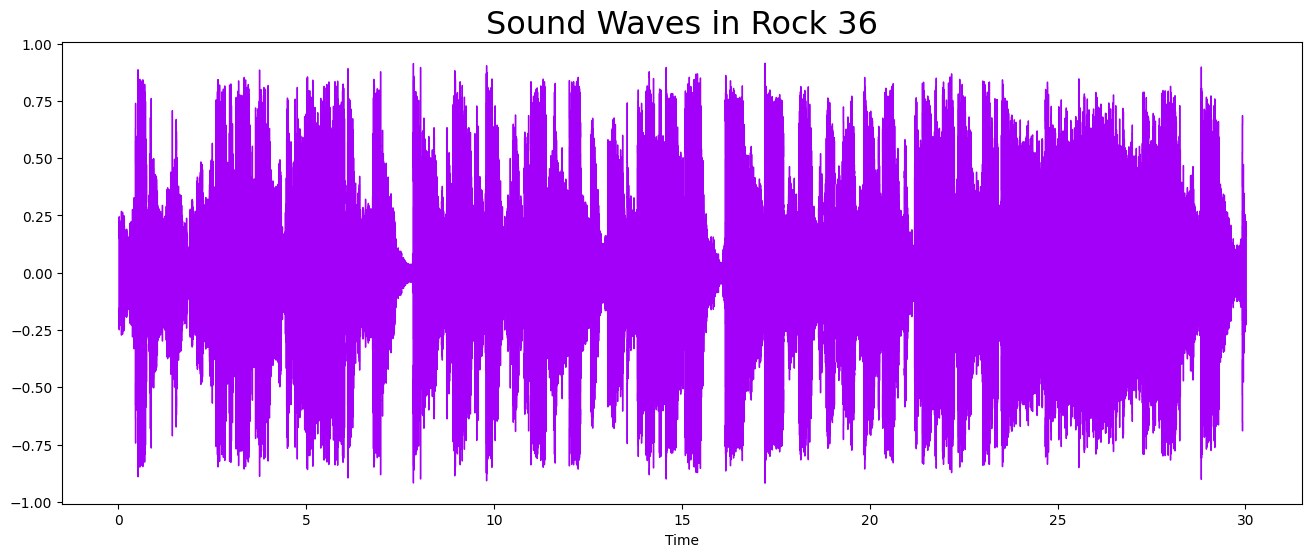

In [24]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Rock 36", fontsize = 23)

### The Spectrogram

In [25]:
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))
print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


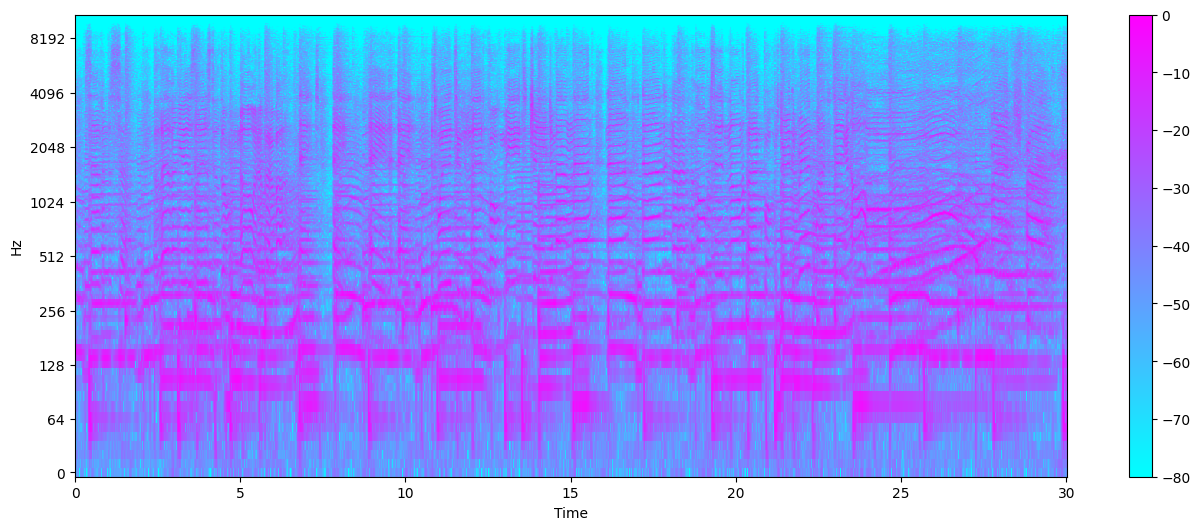

In [26]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB,
                         sr = sr,
                         hop_length = hop_length,
                         x_axis = 'time',
                         y_axis = 'log',
                         cmap = 'cool')
plt.colorbar();

### EDA

In [27]:
data = pd.read_csv(r"D:\GTZAN Dataset\features_30_sec.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Correlation Heatmap for Feature Means

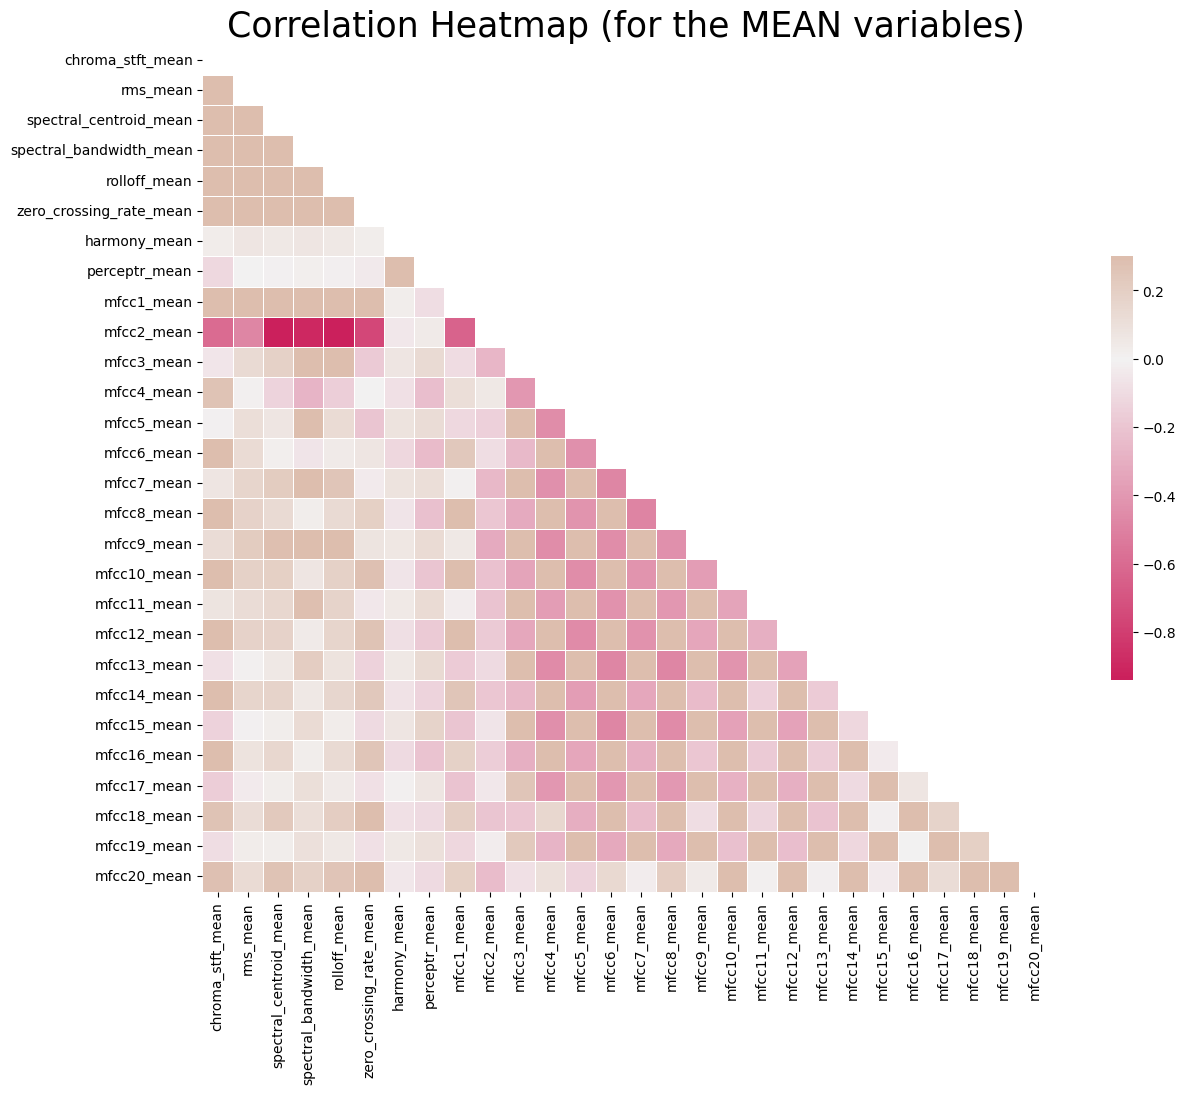

In [29]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### Box Plot for Genres Distributions

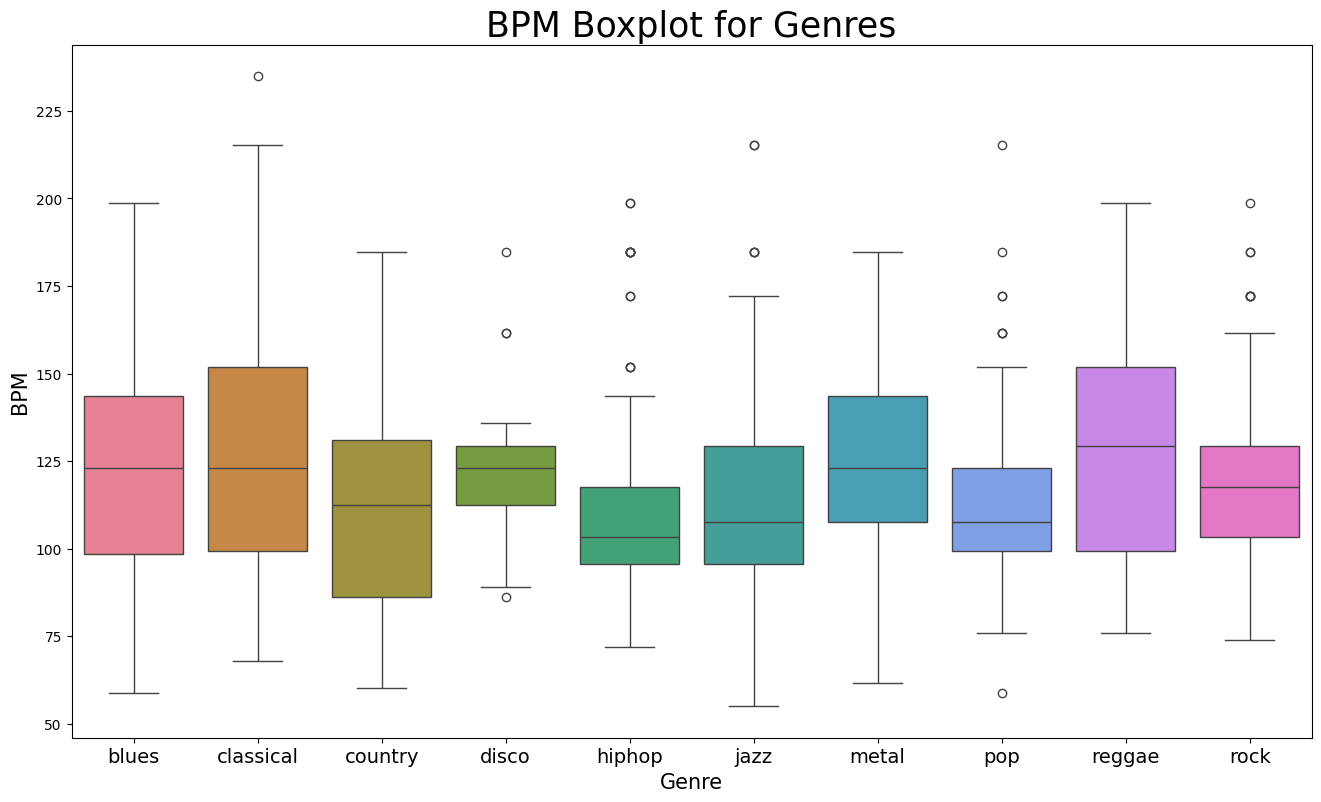

In [30]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

### Principal Component Analysis

In [31]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# Normalize
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


# PCA 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1', 'principal component 2']
)

# Concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

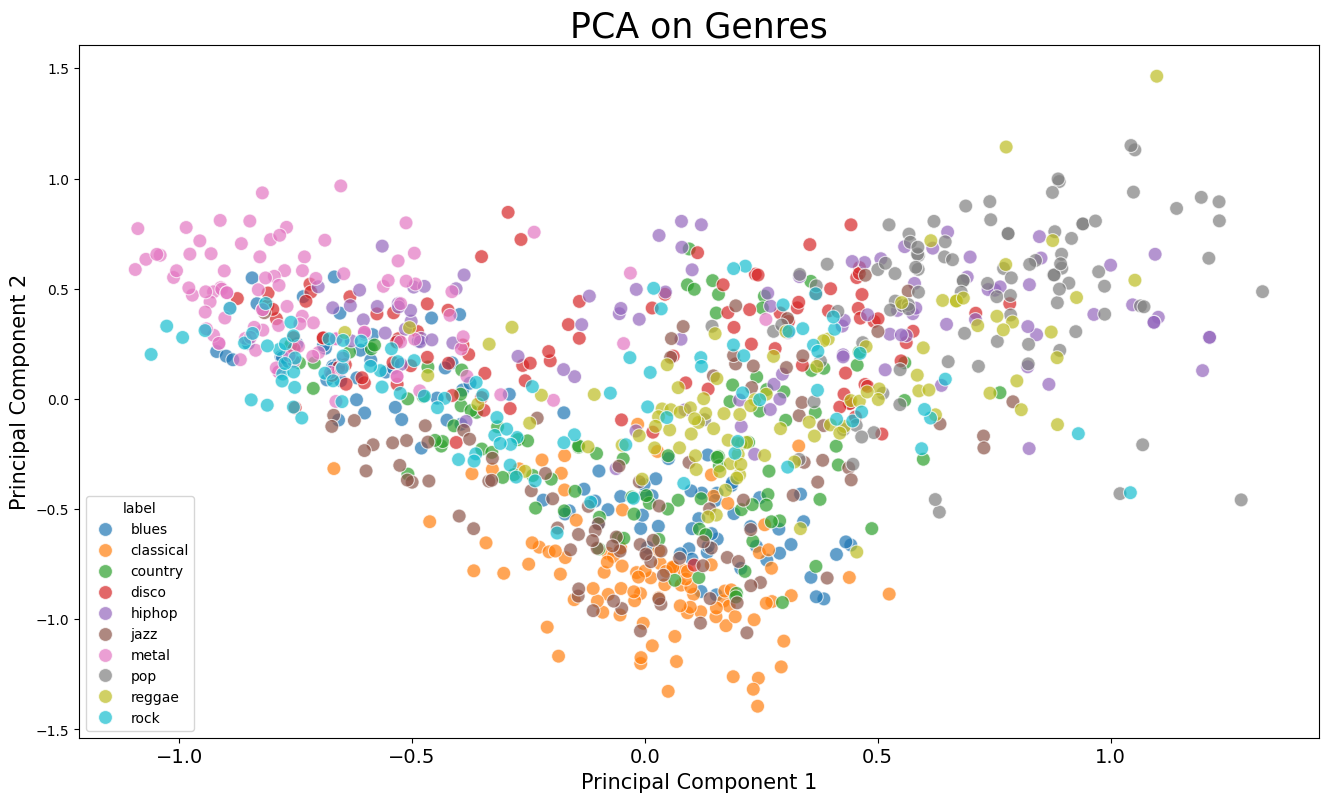

In [32]:
plt.figure(figsize = (16, 9))

sns.scatterplot(x = "principal component 1",
                y = "principal component 2",
                data = finalDf,
                hue = "label",
                alpha = 0.7,
                s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

### Machine Learning Classification

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

Reading in the Data


In [57]:
data = pd.read_csv(r"D:\GTZAN Dataset\features_3_sec.csv")
data = data.iloc[0:, 1:]

data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Features and Target variable


In [58]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] # select all columns but not the labels

# Normalize so everything is on the same scale.
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

Splitting the data into training and testing


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### SVM Model

In [60]:
from sklearn.model_selection import GridSearchCV

C = [0.1, 1, 2.5, 5, 10, 100]
gamma = ["scale", "auto", 1e-2, 1e-3, 1e-4]
param_grid = [
    {"kernel": ["rbf"], "gamma": gamma, "C": C},
    {"kernel": ["poly"], "degree": [1, 2, 3, 4, 5], "gamma": gamma, "C": C},
    {"kernel": ["sigmoid"], "gamma": gamma, "C": C}
]

grid_search = GridSearchCV(SVC(decision_function_shape="ovo"), param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_val, y_val)

grid_search.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [61]:
svm = SVC(decision_function_shape="ovo", **grid_search.best_params_)
svm.fit(X_train, y_train)

SVC(C=100, decision_function_shape='ovo')

In [62]:
preds = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, preds) * 100, 4))

Accuracy: 88.6887


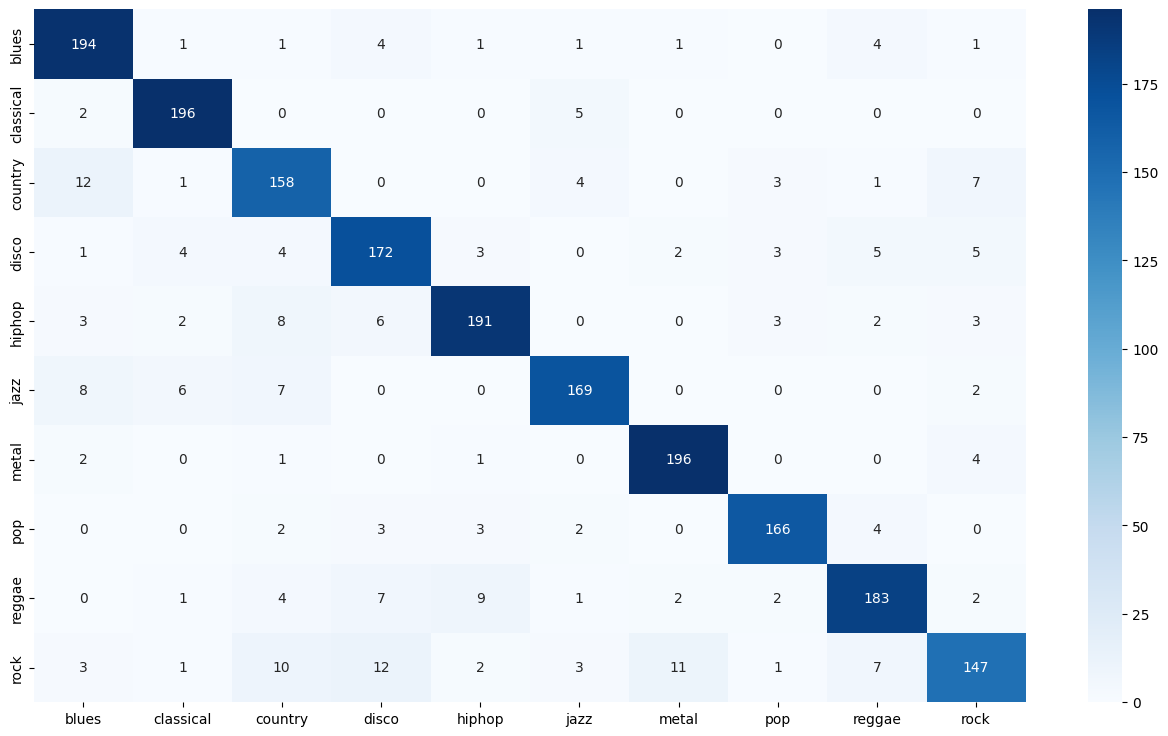

In [64]:
# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds)
labels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr,
            cmap="Blues",
            annot=True,
            fmt='.0f',
            xticklabels=labels,
            yticklabels=labels)

plt.savefig("conf matrix")

### Testing

In [65]:
def extract_audio_features(audio_file_path):
    # Load audio file
    y, sr = librosa.load(audio_file_path)

    # Extract features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    harmony, perceptr = librosa.effects.hpss(y=y)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    # Calculate mean and variance for each feature
    features = {
        'length': len(y),
        'chroma_stft_mean': np.mean(chroma_stft),
        'chroma_stft_var': np.var(chroma_stft),
        'rms_mean': np.mean(rms),
        'rms_var': np.var(rms),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_var': np.var(spectral_centroid),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'spectral_bandwidth_var': np.var(spectral_bandwidth),
        'rolloff_mean': np.mean(rolloff),
        'rolloff_var': np.var(rolloff),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'zero_crossing_rate_var': np.var(zero_crossing_rate),
        'harmony_mean': np.mean(harmony),
        'harmony_var': np.var(harmony),
        'perceptr_mean': np.mean(perceptr),
        'perceptr_var': np.var(perceptr),
        'tempo': tempo
    }

    # Add mean and variance for each MFCC coefficient (mfcc1 to mfcc20)
    for i in range(1, 21):
        features[f'mfcc{i}_mean'] = np.mean(mfcc[i - 1, :])
        features[f'mfcc{i}_var'] = np.var(mfcc[i - 1, :])

    return features

In [101]:
import sounddevice as sd
import wave
filename='recorded_audio.wav'
duration=3
sample_rate=22050

# Record audio from the default microphone
audio_data = sd.rec(int(sample_rate * duration), samplerate=sample_rate, channels=1, dtype='int16')
sd.wait()

# Save the recorded audio to a WAV file
with wave.open(filename, 'wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(2)
    wf.setframerate(sample_rate)
    wf.writeframes(audio_data.tobytes())

features = extract_audio_features(filename)
features = min_max_scaler.transform(pd.DataFrame([features]))
print('The Recording Class is :',svm.predict(features))


Audio recorded and saved to 'recorded_audio.wav'.
The Recording Class is : ['hiphop']
